점진적 학습 : 이미 학습한 훈련 모델에 새로운 데이터가 추가 될 때마다 조금씩 모델을 업데이트하여 배워 나가는 방식
이 중 우리는 확률적 경사 하강법을 알아볼 예정이다
확률적(랜덤으로) 경사하강법 : 현재 위치에서 기울기(경사)를 계산하고, 값이 내려가는 반대 방향으로 조금씩 이동을 반복해 손실을 줄여 간다; 
수식으로는 매 스텝에 파라미터를 현재값 − 학습률 × 기울기로 업데이트한다.​

왜 쓰나
모델의 오차를 나타내는 손실 함수를 최소화해 파라미터를 최적화하기 위해 사용한다.​
함수 형태가 복잡해 해석적으로 해를 못 구할 때도 근사적으로 최소점을 찾아준다.

이 과정에서 훈련세트를 한 번 모두 사용하는게 1 에포크(epoch)
일반적으로 수십, 수백번 이상 에포크 수행한다.

만약 1샘플이 아니라 샘플을 묶어서 학습한다? -> 미니배치 경사하강법
전체 샘플을 한번에 학습한다? -> 배치 경사하강법 ; 근데 컴퓨터 자원을 많이 사용한다.

확률적 경사하강법은 인공신경망 알고리즘에서 꼭 쓰이는 알고리즘이다!

손실함수(loss function) : “예측이 얼마나 틀렸는지”를 숫자로 표시해 주는 채점 기준이다.​
모델은 이 숫자를 작게 만드는 방향으로 파라미터를 조정하며, 손실이 작아질수록 예측이 실제값에 가까워진다.​
근데 손실이 작아진다는게 얼마나 작아져야 하는걸까?

그리고 책에서 정확도에 음수를 취해 확인하였는데 이건 제대로 된 설명이 아니다.
정확도는 계단처럼 불연속적이라 미분이 거의 항상 0이어서 경사하강법으로 학습을 진행할 수 없기 때문이고, 
그래서 보통은 정확도가 아니라 미분 가능한 손실(예: 교차엔트로피, MSE)을 직접 최소화한다.

그럼 어떻게 연속적인 손실 함수 만들 수 있을까? 이건 로지스틱 회귀에서 확률 출력했던 걸 생각해보자

양성 클래스는 -log
음성 클래스는 -log(1-예측확률)
이진 교차엔트로피(로그 손실)이다. 이건 정답일 확률은 크게, 오답일 확률은 작게 만들도록 확률에 음의 로그를 씌운것
양성(y=1): 손실 = −log(p)
모델이 양성일 확률 p를 높게 주면 손실이 0에 가까워지고, 낮게 주면 급격히 커진다. 예: p=0.9 → 0.105, p=0.1 → 2.303.

In [2]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
fish_input=fish[['Weight', 'Length', 'Diagonal','Height','Width']]
#D “열 이름들의 리스트”를 전달해서 DataFrame에서 여러 열을 한꺼번에 선택하려고 했기 때문이다.
#바깥 대괄호는 “열을 선택한다”는 인덱싱 문법이고, 
#안쪽 대괄호는 선택할 열 이름들을 담은 파이썬 리스트다. 즉, fish[['Weight','Length',...]]는 “이 5개 열만 뽑아 새로운 DataFrame을 만들라”는 뜻이다.
fish_target = fish['Species']

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42)

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
from sklearn.linear_model import SGDClassifier
#표준화 한 input 값 준비했다. 그리고 이걸 SGDClassifier로 확률경사하강법 불러온다
sc=SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
#SGDClassifier 객체 만들때는 2개의 매개변수를 지정한다.
#함수로 로지스틱 손실함수를 지정 -> loss=log_loss, 에포크는 max_iter로 10 지정! 그리고 균일한 랜덤을 위해 random_state 설정!
#SGDClassifier 객체 만들때는 함수지정, 에포크 지정 해야한다!
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.773109243697479
0.775


/home/user1/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [5]:
sc.partial_fit(train_scaled, train_target)
#partial_fit은 "이어 하던 공부를 계속하는 학습” 메서드다. 한 번에 전부 처음부터 학습하는 fit과 달리, 현재까지의 가중치를 유지한 채 주어진 배치로만 추가 업데이트한다.
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
#이 코드를 실행할수록 점수가 점점 높아진다! 에포크가 늘어날수록 점수는 향상된다.

0.7983193277310925
0.775


에포크의 과대/과소적합
확률적 경사하강법은 에포크의 횟수가 늘어날수록 당연하게도! 과대적합이 발생
그럼 적절한 에포크 횟수는 어떻게 정해야할까?
전에 alpha값을 찾았던 것처럼 과대/과소적합을 위한 '적절함'을 찾는 과정이 필요해!


In [6]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score=[]
test_score=[]
classes = np.unique(train_target)
#train_score, test_score 결과를 담을 각각의 리스트를 준비했다.

for _ in range(0,300) :
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
    #300번의 에포크를 수행하면서 그때마다 train, test 점수를 리스트에 추가함
    #이걸 그래프로 그려볼까?

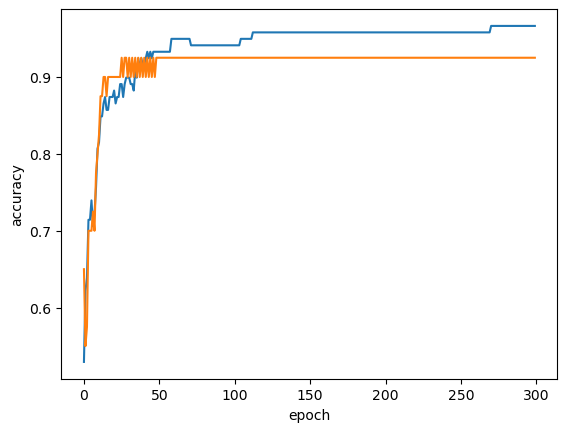

In [7]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
#y축 정확도! train과 test의 갭이 가장 큰 지점의 직전! 그러니까 test가 작아지기 시작하기 직전!(과대적합되면 test 정확도 떨어짐)
#여기서는 에포크 100회

In [8]:
sc=SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
#tol=none 에포크 100회까지 계속 하라~
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.957983193277311
0.925


tol 

“멈출지 말지 결정하는 최소 개선량(허용오차)”이다. 쉽게 말해, 학습을 여러 번 반복하다가 

최근 반복들에서 손실/점수가 tol 만큼도 좋아지지 않으면 “충분히 수렴했다”고 보고 학습을 일찍 멈춘다.

tol=0.001 같은 값: 최근 에폭들의 성능이 0.001보다 더 좋아지지 않으면 조기 종료.

tol=None: 개선 여부를 보지 않고 정해둔 max_iter 횟수만큼 끝까지 돈다.

왜 쓰나: 불필요한 반복을 줄여 속도를 높이고, 과적합을 어느 정도 방지하려고.

In [9]:
sc=SGDClassifier(loss='hinge',max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


loss=hinge
힌지손실 -> 서포트 벡터 머신으로 머신러닝을 위한 손실함수
 “점수를 크게 만들되, 틀린 쪽과의 간격이 최소한 마진만큼은 벌어지게” 만드는 분류용 손실이야. 쉽게 말해, 정답 쪽 점수가 다른 클래스 점수보다 
 충분히 크게만 나오면 벌점은 0이고, 그 간격이 부족하거나 잘못 분류했을수록 벌점이 선형으로 커져 더 멀어지도록 학습을 밀어줘.

SVM 같은 “최대 마진” 분류에서 결정경계와 데이터 사이의 여유(마진)를 키워 일반화 성능을 높이려고 쓴다.
교차엔트로피처럼 확률을 직접 다루지 않고, “점수 간 차이”에 집중해 잘못되었거나 마진 안쪽의 예시만 강하게 벌점 준다.
